### Импорт библиотек  
### Importing libraries  

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Импортируем библиотеки, необходимые для обучения моделей
# Import the libraries for the machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

## Импорт данных  
## Data import  

In [67]:
from google.colab import files
uploaded=files.upload()

df = pd.read_csv('titanic.csv', sep=',')

Saving titanic.csv to titanic.csv


##Объявляем переменные и описываем функции  
##Declare variables and describe functions  

In [3]:
# Воспользуемся функцией построения матрицы ошибок из документации sklearn

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Подготовка датафрейма  

In [4]:
# Копируем датасет в новывй датафрейм  
# Copy the dataset into a new dataframe
titanicDF = df.copy()

In [5]:
# Смотрим в каких колонках не хватает данных  
# Check the columns without all the data
titanicDF.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
# Заполняем отсутствующие значения для возраста
# Fill the missing values for the passengers age
titanicDF['NamePrefix'] = titanicDF.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanicDF['Age'] = titanicDF.groupby(['Pclass', 'Sex', 'NamePrefix']).Age.apply(lambda x: x.fillna(x.median()))
titanicDF.Age.fillna(titanicDF.Age.median(), inplace=True)

In [7]:
# Заполняем отсутствующие значения для потраченных пассажиром средств
# Fill in the missing values for the funds spent by the passenger
titanicDF['Fare'] = titanicDF.groupby(['Pclass']).Fare.apply(lambda x: x.fillna(x.median()))

In [8]:
# Посчитаем общее количество родственников, для каждого пассажира и запишем в отдельную колонку
# Calculate sum of relatives for each passenger
titanicDF['Relative'] = titanicDF.SibSp + titanicDF.Parch

In [9]:
# Меняем строчные данные на цифровые
# Change the string type of data to the numeric
titanicDF['SexNum'] = LabelEncoder().fit_transform(titanicDF.Sex)
titanicDF['EmbarkedNum'] = LabelEncoder().fit_transform(titanicDF.Embarked)

In [10]:
# Заносим данные о выживших пассажирах в отдельную переменную  
# Move the data about surviving passengers into another variable
y = titanicDF.Survived

In [11]:
# Отсавляем только те данные, которые нам понадобятся для обучения нейронной сети  
# Keep the data, whith we will use for training the model
X = titanicDF.drop(columns=['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'NamePrefix'])

## Машинное обучение  

In [63]:
# Разобьем общую выборку данных на тренировочную(на которой мы будем обучать модель) и тестовую(на которой мы будем проверять качество работы модели)
# Split the total data sample into the training one (on which we will train the model) and the test one (on which we will check the quality of the model)
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=None)

# Стандартизируем данные
# Standardizing data
scaler = StandardScaler()
scaler.fit(XTrain)

XTrainSc = scaler.transform(XTrain)
XTestSc = scaler.transform(XTest)

In [59]:
# Разобьем общую выборку данных на тренировочную(на которой мы будем обучать модель) и тестовую(на которой мы будем проверять качество работы модели)
# Split the total data sample into the training one (on which we will train the model) and the test one (on which we will check the quality of the model)
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=None)

### Метод k-ближайших соседей  
### K-Neighbors method  

In [64]:
# Обучаем модель
# Training the model
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(XTrain, yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Confusion matrix, without normalization
[[66 17]
 [23 20]]


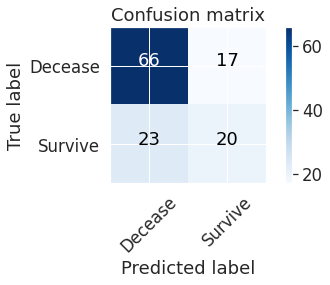

In [65]:
# Рассчитаем и построим матрицу ошибок
# Build the confusion matrix
ConfusionMatrixKNeighbors = confusion_matrix(yTest, classifier.predict(XTest))
plot_confusion_matrix(ConfusionMatrixKNeighbors, classes=['Decease', 'Survive'], title='Confusion matrix')

In [66]:
# Посчитаем основные метрики для обоих событий, для расчетов воспользуемся встроенной функцией sklern classification_report
# Calculate general metrics for both events, use classification_report function by sklern for it
print(classification_report(yTest, classifier.predict(XTest), target_names=['Decease', 'Survive']))

              precision    recall  f1-score   support

     Decease       0.74      0.80      0.77        83
     Survive       0.54      0.47      0.50        43

    accuracy                           0.68       126
   macro avg       0.64      0.63      0.63       126
weighted avg       0.67      0.68      0.68       126



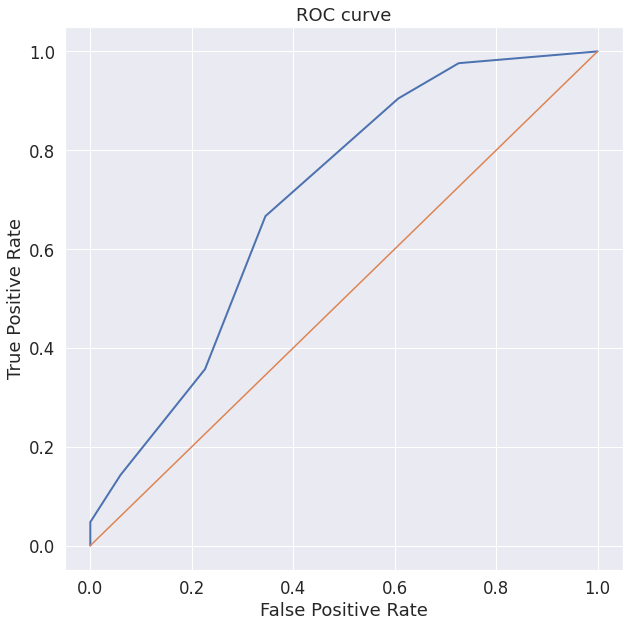

In [20]:
# ROC AUC
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 10))
fpr, tpr, thresholds = roc_curve(yTest, classifier.predict_proba(XTest)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

### Нейронная сеть  
### Neural network  

Confusion matrix, without normalization
[[84  0]
 [ 0 42]]


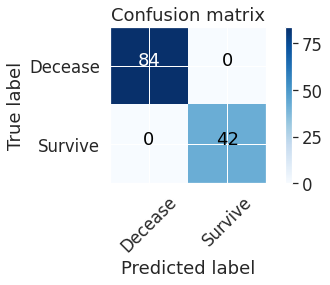

In [21]:
# Обучаем модель
# Training the model
mlp = MLPClassifier(hidden_layer_sizes=(6, 5, 4, 3, 2), max_iter=100000, random_state=None, alpha=0.00001)
mlp.fit(XTrain, yTrain)

# Рассчитаем и построим матрицу ошибок
# Build the confusion matrix
ConfusionMatrixMLP = confusion_matrix(yTest, mlp.predict(XTest))
plot_confusion_matrix(ConfusionMatrixMLP, classes=['Decease', 'Survive'], title='Confusion matrix')

In [22]:
# Посчитаем основные метрики для обоих событий, для расчетов воспользуемся встроенной функцией sklern classification_report
# Calculate general metrics for both events, use classification_report function by sklern for it
print(classification_report(yTest, mlp.predict(XTest), target_names=['Decease', 'Survive']))

              precision    recall  f1-score   support

     Decease       1.00      1.00      1.00        84
     Survive       1.00      1.00      1.00        42

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



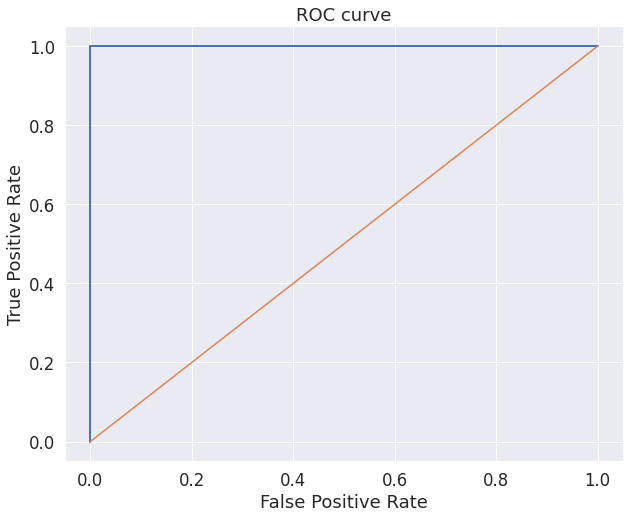

In [23]:
# ROC AUC
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(yTest, mlp.predict_proba(XTest)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()